In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
db = pd.read_csv("term-deposit-marketing-2020.csv",sep=';')
db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
list_columns=['job','marital','education','contact','month']
for x in list_columns:
    job_types=db[x].unique()
    le=LabelEncoder()
    db[x] = le.fit_transform(db[x])
db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,no,2143,yes,no,2,5,8,261,1,no
1,44,9,2,1,no,29,yes,no,2,5,8,151,1,no
2,33,2,1,1,no,2,yes,yes,2,5,8,76,1,no
3,47,1,1,3,no,1506,yes,no,2,5,8,92,1,no
4,33,11,2,3,no,1,no,no,2,5,8,198,1,no


In [4]:
boolen_columns=['default','housing','loan','y']
for x in boolen_columns:
    db[x] = db[x].map({'yes': 1, 'no': 0})
db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [ ]:
"job","marital","education","default","housing","loan","campaign","month","contact"
"job","education","default","campaign","month","age","duration","day","balance"

In [57]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
logreg = LogisticRegression(solver='liblinear',multi_class='ovr')
xgb = xgb.XGBClassifier()
gnb = GaussianNB()

In [24]:
db.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
age,1.000000,-0.019719,-0.386716,-0.091083,-0.014857,0.081517,-0.179606,0.000041,0.041114,-0.011689,-0.063437,-0.036270,0.016204,-0.020273
job,-0.019719,1.000000,0.051588,0.174336,-0.004977,0.015187,-0.114148,-0.024220,-0.077812,0.028441,-0.106735,-0.002445,0.013914,0.017250
marital,-0.386716,0.051588,1.000000,0.095899,-0.004595,0.008542,0.004453,-0.042975,-0.029242,0.000099,-0.006779,0.015772,-0.001259,0.030229
education,-0.091083,0.174336,0.095899,1.000000,-0.006647,0.066592,-0.083699,-0.043702,-0.096023,0.036206,-0.066100,0.001828,0.016562,0.037585
default,-0.014857,-0.004977,-0.004595,-0.006647,1.000000,-0.070069,-0.019229,0.075006,0.006881,0.006287,0.013660,-0.008597,0.012135,-0.006559
balance,0.081517,0.015187,0.008542,0.066592,-0.070069,1.000000,-0.049946,-0.080596,-0.011681,0.011662,0.023718,0.014072,-0.008137,0.030232
housing,-0.179606,-0.114148,0.004453,-0.083699,-0.019229,-0.049946,1.000000,0.004266,0.164406,-0.050622,0.327019,0.022455,-0.054823,-0.054336
loan,0.000041,-0.024220,-0.042975,-0.043702,0.075006,-0.080596,0.004266,1.000000,-0.030899,0.005838,0.027403,-0.003952,0.000582,-0.031029
contact,0.041114,-0.077812,-0.029242,-0.096023,0.006881,-0.011681,0.164406,-0.030899,1.000000,-0.045535,0.410025,-0.008292,0.003019,-0.089626
day,-0.011689,0.028441,0.000099,0.036206,0.006287,0.011662,-0.050622,0.005838,-0.045535,1.000000,-0.002587,-0.032983,0.165429,-0.006420


In [31]:
db.corr()[['y']].sort_values(by='y', ascending=False)

,y
y,1.000000
duration,0.461169
education,0.037585
balance,0.030232
marital,0.030229
job,0.017250
day,-0.006420
default,-0.006559
age,-0.020273
loan,-0.031029


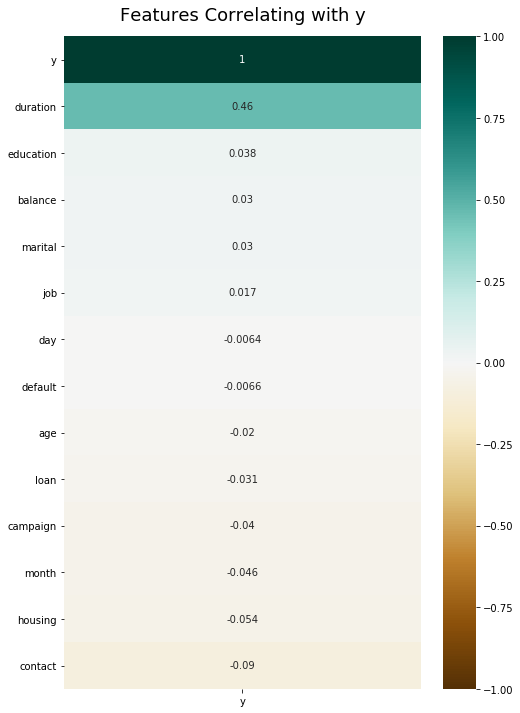

In [114]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(db.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with y', fontdict={'fontsize':18}, pad=16);

# Features to focus on include: Duration, education, balance, marital

In [105]:
X = db.drop(["y","job","contact","month","age","day","default","loan","campaign","housing"],axis=1)
y = db['y']
X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.10 )

In [106]:
def model(name, X_train,y_train,X_test,y_test):
    name.fit(X_train, y_train)
    y_pred = name.predict(X_test)
    score= accuracy_score(y_test, y_pred) * 100
    print(str(name) + "Accuracy:",score)
    report_name=classification_report(y_test, y_pred)
    print(report_name)
    print(confusion_matrix(y_test,y_pred))

In [107]:
def crossval(model,X,y,n):
    scores=cross_val_score(model, X,y,cv=n, scoring ="accuracy")
    print("5-fold Cross Validation " + "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [109]:
model(dt,X_train,y_train,X_test,y_test)
crossval(dt,X,y,5)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')Accuracy: 90.375
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3719
           1       0.32      0.33      0.33       281

    accuracy                           0.90      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.91      0.90      0.90      4000

[[3522  197]
 [ 188   93]]
5-fold Cross Validation Accuracy: 0.90 (+/- 0.01)


In [110]:
model(rf,X_train,y_train,X_test,y_test)
crossval(rf,X,y,5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)Accuracy: 92.425
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3719
           1       0.43      0.26      0.33       281

    accuracy                           0.92      4000
   macro avg       0.69      0.62      0.64      4000
weighted avg       0.91      0.92      0.92      4000

[[3624   95]
 [ 208   73]]
5-fold Cross Validation Accuracy: 0.92 (+/- 0.01)


In [111]:
model(logreg,X_train,y_train,X_test,y_test)
crossval(logreg,X,y,5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)Accuracy: 93.30000000000001
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3719
           1       0.56      0.20      0.30       281

    accuracy                           0.93      4000
   macro avg       0.75      0.60      0.63      4000
weighted avg       0.92      0.93      0.92      4000

[[3675   44]
 [ 224   57]]
5-fold Cross Validation Accuracy: 0.93 (+/- 0.01)


In [112]:
model(xgb,X_train,y_train,X_test,y_test)
crossval(xgb,X,y,5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)Accuracy: 93.10000000000001
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3719
           1       0.52      0.26      0.34       281

    accuracy                           0.93      4000
   macro avg       0.73      0.62      0.65      4000
weighted avg       0.92      0.93      0.92      4000

[[3652   67]
 [ 209   72]]
5-fold Cross Validation Accuracy: 0.93 (+/- 0.01)


In [113]:
model(gnb,X_train,y_train,X_test,y_test)
crossval(gnb,X,y,5)

GaussianNB(priors=None, var_smoothing=1e-09)Accuracy: 92.9
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3719
           1       0.49      0.35      0.41       281

    accuracy                           0.93      4000
   macro avg       0.72      0.66      0.69      4000
weighted avg       0.92      0.93      0.92      4000

[[3618  101]
 [ 183   98]]
5-fold Cross Validation Accuracy: 0.93 (+/- 0.02)


# According to the results above, the most reasonable algorithms to use is logistic regression, xgboost and gaussian naive bayes.